In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
M_H= 1.6726231E-24 #mass of the proton in grams
P_sun= 27.2 #rotation period of Sun in day
r_sun=6.96E10 #radius of the sun in cm

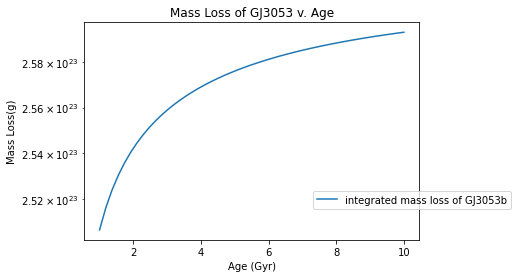

In [3]:
#GJ3053

def wind_velocity_M2_rot1_GJ3053(T): #wind velocity as a function of time
    return 2*(180*((1.5*(27/((T-0.012)/0.061))**1.2)*10**6/(2*10**6))**(1/2))*np.log(14002560*10**5/((2*10**11)*(0.179/1)*((1.5*(27/((T-0.012)/0.061))**1.2)*10**6/(2*10**6))**(-1)))**0.5

def wind_density_GJ3053(T): #wind density as a function of time
    return ((3.3E5*(14002560*10**5/r_sun)**-2 + 4.16E6*(14002560*10**5/r_sun)**-4 + 8.0E7*(14002560*10**5/r_sun)**-6)*(M_H/2)*((P_sun/((T-0.012)/0.061))**0.6))

def mass_loss_rate_GJ3053(T): #mass loss rate as a function of time
    return 6.28*(10958.1**2)*0.3*(wind_density_GJ3053(T)*10**15)*(wind_velocity_M2_rot1_GJ3053(T))*3.1536e+16

def integrated_mass_loss_GJ3053(T): #total mass loss as a function of time
    res = np.zeros_like(x)
    for i,val in enumerate(x):
        y,err = integrate.quad(mass_loss_rate_GJ3053,0.0121,val)
        res[i]=y
    return res

x = np.linspace(1, 10)
y = integrated_mass_loss_GJ3053(x)

plt.plot(x,y, label="integrated mass loss of GJ3053b")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('Mass Loss of GJ3053 v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Mass Loss(g)')
plt.yscale('log')

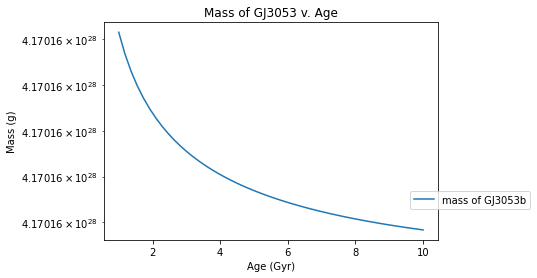

In [4]:
def mass_of_GJ3053_at_each_time(T): 
#mass of the planet as a function of time...calculate initial planet mass (current mass + total mass loss by today) and them subtract mass loss as time passes 
    return 4.1701889e+28-integrated_mass_loss_GJ3053(T)

x = np.linspace(1, 10)
y = mass_of_GJ3053_at_each_time(x)

plt.plot(x,y, label="mass of GJ3053b")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('Mass of GJ3053 v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Mass (g)')
plt.yscale('log')

In [5]:
total_mass_loss_GJ3053= 1.889016411827875e+24 #in grams #total mass loss by today

#remember to ask for current envelope fraction...what I have is primordial
current_envelope_fraction_mass_GJ3053= (0.1/100)*4.17E+28 #in grams #envelope fraction mass today

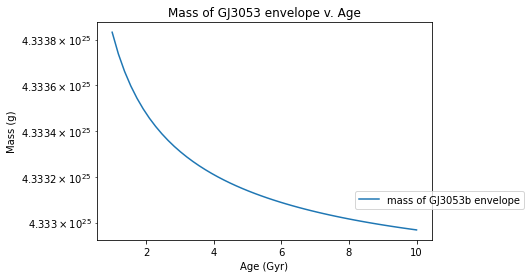

In [6]:
def mass_env_new_GJ3053(T): #in grams #mass of the envelope as a function of time 
    return (current_envelope_fraction_mass_GJ3053 + total_mass_loss_GJ3053)- integrated_mass_loss_GJ3053(T)

x = np.linspace(1, 10)
y = mass_env_new_GJ3053(x)

plt.plot(x,y, label="mass of GJ3053b envelope")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('Mass of GJ3053 envelope v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Mass (g)')
plt.yscale('log')

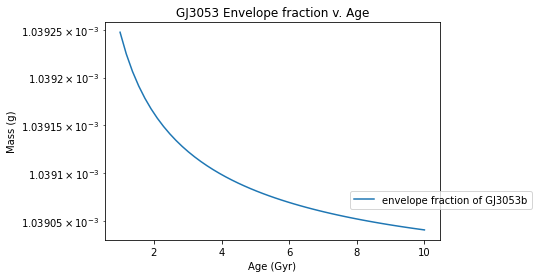

In [7]:
def envelope_fraction_GJ3053(T):
    return mass_env_new_GJ3053(T)/mass_of_GJ3053_at_each_time(T)

x = np.linspace(1, 10)
y = envelope_fraction_GJ3053(x)

plt.plot(x,y, label="envelope fraction of GJ3053b")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('GJ3053 Envelope fraction v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Mass (g)')
plt.yscale('log')

Text(0, 0.5, 'Radius (km)')

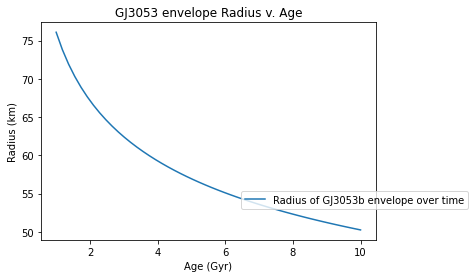

In [8]:
def radius_of_GJ3053_envelope_at_each_time(T):
    return 2.06*6378*((mass_of_GJ3053_at_each_time(T)/5.972e+27)**-0.21)*((envelope_fraction_GJ3053(T)/5)**0.59)*((4.97902905e-01)**0.044)*((T/5)**-0.18)

x = np.linspace(1, 10)
y = radius_of_GJ3053_envelope_at_each_time(x)

plt.plot(x,y, label="Radius of GJ3053b envelope over time")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('GJ3053 envelope Radius v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Radius (km)')


Text(0, 0.5, 'Radius (km)')

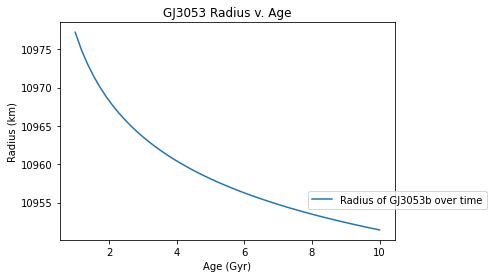

In [9]:
GJ3053_radius= 10958.1 #km #make extra plot into Earth radii

def radius_GJ3053_overtime(T):
    return (GJ3053_radius-radius_of_GJ3053_envelope_at_each_time(5))+radius_of_GJ3053_envelope_at_each_time(T)

x = np.linspace(1, 10)
y = radius_GJ3053_overtime(x)

plt.plot(x,y, label="Radius of GJ3053b over time")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('GJ3053 Radius v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Radius (km)')

Text(0, 0.5, 'Mass loss rate (g/s)')

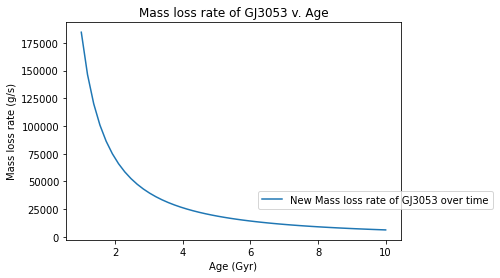

In [10]:
def new_mass_loss_rate_GJ3053(T):
    return 6.28*(radius_GJ3053_overtime(T)**2)*0.3*(wind_density_GJ3053(T)*10**15)*(wind_velocity_M2_rot1_GJ3053(T))

x = np.linspace(1, 10)
y =new_mass_loss_rate_GJ3053(x)

plt.plot(x,y, label="New Mass loss rate of GJ3053 over time")
plt.legend(loc= 'lower right', bbox_to_anchor=(1.29, +0.12))
plt.title('Mass loss rate of GJ3053 v. Age')
plt.xlabel('Age (Gyr)')
plt.ylabel('Mass loss rate (g/s)')

/Users/kalgi/Desktop/lum evo/Lum_evo_0_GJ1132.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_1_K138.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_2_K2-3.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_3_GJ3053.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_4_K2-3.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_5_55Cnc.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_6_GJ9827.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_7_K218.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_8_GJ97658.csv
/Users/kalgi/Desktop/lum evo/Lum_evo_9_GJ1214.csv
0 0.0153
[30.84976898 20.38434947 20.40937245 20.40937245 20.40937245 20.40937245
 20.40937245 20.43441847 20.43441847 20.62318807 20.62318807]
1 0.127
[2.41588407 2.1360347  2.15947263 2.16651534 2.17592473 2.18535451
 2.19480468 2.20667282 2.20667282 2.21858396 2.21858396]
2 0.209
[1.84625172 1.55153682 1.56686668 1.57410433 1.5829591  1.59024934
 1.60078256 1.60975149 1.62038702 1.62364736 1.63435813]
3 0.0936
[0.64525918 0.39142434 0.39142434 0.39142434 0.39142434 0.39142434
 0.39142434 0.39191523 0

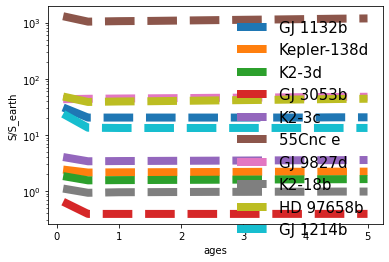

In [11]:
#Luminosity

import os

import glob

directory = '/Users/kalgi/Desktop/lum evo'

os.chdir('%s'%directory)

table_plan = np.genfromtxt("/Users/kalgi/Desktop/Terrestrials (6).csv", delimiter=",", usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18), skip_header=1)
table_plan =np.transpose(table_plan)

table_STR = np.genfromtxt('/Users/kalgi/Desktop/Terrestrials (6).csv', delimiter=",", usecols=(0,14), skip_header=1, dtype=str)
table_STR =np.transpose(table_STR)
#dtype=str


Mass = table_plan[0]
Mass_err = table_plan[1]
Radius = table_plan[3]
Radius_err = table_plan[4]
Teq = table_plan[9]
semi = table_plan[12]
names = table_STR[0]
spec_type = table_STR[1]
star_rad = table_plan[13]
plan_irr = table_plan[15]
ecc = table_plan[16]
 

teff_evo = []

rad_evo = []

for infile in sorted(glob.glob('%s/Lum_evo*.csv'%(directory))):

    print(infile)

    importeddata = np.genfromtxt(infile, delimiter=",", usecols=(0,2,3,5,6), skip_header=1)

    stellar_teff = importeddata[:,1]

    stellar_rad = importeddata[:,3]

    teff_evo.append(stellar_teff)

    rad_evo.append(stellar_rad)

ages = np.array([0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
F_planirr = []

for i,ss,nm,ec in zip(range(0,len(teff_evo)),semi,names,ecc):

    print(i,ss)

    Temp = teff_evo[i]/5778

    sqrt = np.sqrt(1./(1-ec**2))

    F = ((rad_evo[i])**2)*((Temp)**4)*(ss**(-2))*(sqrt) #change semi-major axis

    F_planirr.append(F)

    print(F)

    #print(ss, teff_evo[i])

   

    plt.plot(ages,F,'--',linewidth=8,label=nm)

    plt.ylabel('S/S_earth')

    plt.xlabel('ages')

    plt.yscale('log')

legend = plt.legend(loc='upper right', shadow=True, fontsize = '15', frameon=False,scatterpoints = 1)